# <span style= "background:yellow">Group-level analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.__version__

'0.13.2'

In [4]:
import matplotlib
matplotlib.__version__

'3.5.2'

In [28]:
df=pd.read_excel('../pre-post_experiment/results/PreprocessedResults_NoOutliers.xlsx')
df=df.iloc[:,[0,11,12,13,14,15,16,17,18,19]]
df.rename(lambda x:x.replace('.1',''),axis='columns',inplace=True)
def specify_group(x):
    parts=x.split('_')[1]
    if parts == 'audtrain1':
        return 'aud'
    elif parts == 'audtrain2':
        return 'aud'
    elif parts == 'vistrain1':
        return 'vis'
    elif parts == 'vistrain2':
        return 'vis'
    elif parts == 'notrain':
        return 'notrain'
def specify_time(x):
    if x.split('_')[2] == 'post':
        return 'Post'
    else:
        return 'Pre'
df['group']=df['Name'].apply(specify_group)
df['Time']=df['Name'].apply(specify_time)
df

,Name,AudSD,AudIrreg,AudReg,VisSD,VisIrreg,VisReg,TactSD,TactIrreg,TactReg,group,Time
0,train10_audtrain2_2023-11-09,0.86,0.54,0.83,0.71,0.79,0.63,0.76,0.71,0.63,aud,Pre
1,train10_audtrain2_post_2023-11-23,0.86,0.46,0.96,0.62,0.67,0.50,0.67,0.63,0.88,aud,Post
2,train11_vistrain2_2023-11-09,0.57,0.33,0.50,0.43,0.46,0.29,0.71,0.21,0.42,vis,Pre
3,train11_vistrain2_post_2023-11-23,0.76,0.58,0.50,0.29,0.42,0.42,0.62,0.46,0.21,vis,Post
4,train14_notrain_2023-11-10,0.81,0.29,0.46,0.57,0.50,0.33,0.76,0.38,0.29,notrain,Pre
...,...,...,...,...,...,...,...,...,...,...,...,...
123,train81_audtrain1_post_2024-03-30,1.00,0.88,0.96,0.81,0.75,0.75,0.90,0.67,0.88,aud,Post
124,train8_notrain_2023-11-07,0.62,0.83,0.67,0.76,0.38,0.38,0.76,0.58,0.33,notrain,Pre
125,train8_notrain_post_2023-11-21,0.71,0.54,0.63,0.76,0.67,0.46,0.76,0.46,0.63,notrain,Post
126,train9_notrain_2023-11-08,0.90,0.50,0.54,0.71,0.50,0.54,0.71,0.63,0.50,notrain,Pre


# Performance in auditory modality

In [4]:
print(df[df['Time']=='Pre']['AudSD'].mean())
print(df[df['Time']=='Post']['AudSD'].mean())
print(df[df['Time']=='Pre']['AudIrreg'].mean())
print(df[df['Time']=='Post']['AudIrreg'].mean())
print(df[df['Time']=='Pre']['AudReg'].mean())
print(df[df['Time']=='Post']['AudReg'].mean())

0.7785937500000001
0.7659375
0.5596875
0.5884375
0.6271875
0.63921875


In [5]:
## running paired t-test
from scipy.stats import ttest_rel
t_statistic, p_value = ttest_rel(df[df['Time']=='Pre']['AudSD'], df[df['Time']=='Post']['AudSD'])
print(t_statistic)
display(p_value)
t_statistic, p_value = ttest_rel(df[df['Time']=='Pre']['AudIrreg'], df[df['Time']=='Post']['AudIrreg'])
print(t_statistic)
print(p_value)
t_statistic, p_value = ttest_rel(df[df['Time']=='Pre']['AudReg'], df[df['Time']=='Post']['AudReg'])
print(t_statistic)
print(p_value)

0.8055630812518468


0.4235249311600039

-1.3124757712138002
0.19412121948769748
-0.6302679766679539
0.5307988201687374


In [6]:
print(df.query("Time=='Pre'and group=='aud'")['AudSD'].mean())
print(df.query("Time=='Post'and group=='aud'")['AudSD'].mean())
print(df.query("Time=='Pre'and group=='aud'")['AudIrreg'].mean())
print(df.query("Time=='Post'and group=='aud'")['AudIrreg'].mean())
print(df.query("Time=='Pre'and group=='aud'")['AudReg'].mean())
print(df.query("Time=='Post'and group=='aud'")['AudReg'].mean())

0.7545000000000001
0.7689999999999999
0.5385
0.5685
0.6500000000000001
0.7285


In [7]:
t_statistic, p_value = ttest_rel(df.query("Time=='Pre'and group=='aud'")['AudSD'], df.query("Time=='Post'and group=='aud'")['AudSD'])
print(t_statistic)
display(p_value)
t_statistic, p_value = ttest_rel(df.query("Time=='Pre'and group=='aud'")['AudIrreg'], df.query("Time=='Post'and group=='aud'")['AudIrreg'])
print(t_statistic)
print(p_value)
t_statistic, p_value = ttest_rel(df.query("Time=='Pre'and group=='aud'")['AudReg'], df.query("Time=='Post'and group=='aud'")['AudReg'])
print(t_statistic)
print(p_value)

-0.5024309378845615


0.6211378565720886

-0.8192158443817041
0.422820619834554
-2.666829592649802
0.015239937938257966


In [8]:
t_statistic, p_value = ttest_rel(df.query("Time=='Pre'and group=='vis'")['AudSD'], df.query("Time=='Post'and group=='vis'")['AudSD'])
print(t_statistic)
print(p_value)
t_statistic, p_value = ttest_rel(df.query("Time=='Pre'and group=='vis'")['AudIrreg'], df.query("Time=='Post'and group=='vis'")['AudIrreg'])
print(t_statistic)
print(p_value)
t_statistic, p_value = ttest_rel(df.query("Time=='Pre'and group=='vis'")['AudReg'], df.query("Time=='Post'and group=='vis'")['AudReg'])
print(t_statistic)
print(p_value)

0.6892581650054133
0.49755612510833624
-1.5351976466078239
0.13837819150715105
0.15640971342237533
0.8770748777051028


In [9]:
t_statistic, p_value = ttest_rel(df.query("Time=='Pre'and group=='notrain'")['AudSD'], df.query("Time=='Post'and group=='notrain'")['AudSD'])
print(t_statistic)
print(p_value)
t_statistic, p_value = ttest_rel(df.query("Time=='Pre'and group=='notrain'")['AudIrreg'], df.query("Time=='Post'and group=='notrain'")['AudIrreg'])
print(t_statistic)
print(p_value)
t_statistic, p_value = ttest_rel(df.query("Time=='Pre'and group=='notrain'")['AudReg'], df.query("Time=='Post'and group=='notrain'")['AudReg'])
print(t_statistic)
print(p_value)

1.2510036814605743
0.22611900728495216
0.25166230972089293
0.8040040542495468
0.9258047481148006
0.3661582066682999


In [10]:
df1=df.melt(['Time','group'],['AudSD','AudIrreg','AudReg'],var_name='Timing_level',value_name='value')
df1

,Time,group,Timing_level,value
0,Pre,aud,AudSD,0.86
1,Post,aud,AudSD,0.86
2,Pre,vis,AudSD,0.57
3,Post,vis,AudSD,0.76
4,Pre,notrain,AudSD,0.81
...,...,...,...,...
379,Post,aud,AudReg,0.96
380,Pre,notrain,AudReg,0.67
381,Post,notrain,AudReg,0.63
382,Pre,notrain,AudReg,0.54


<Figure size 300x400 with 0 Axes>

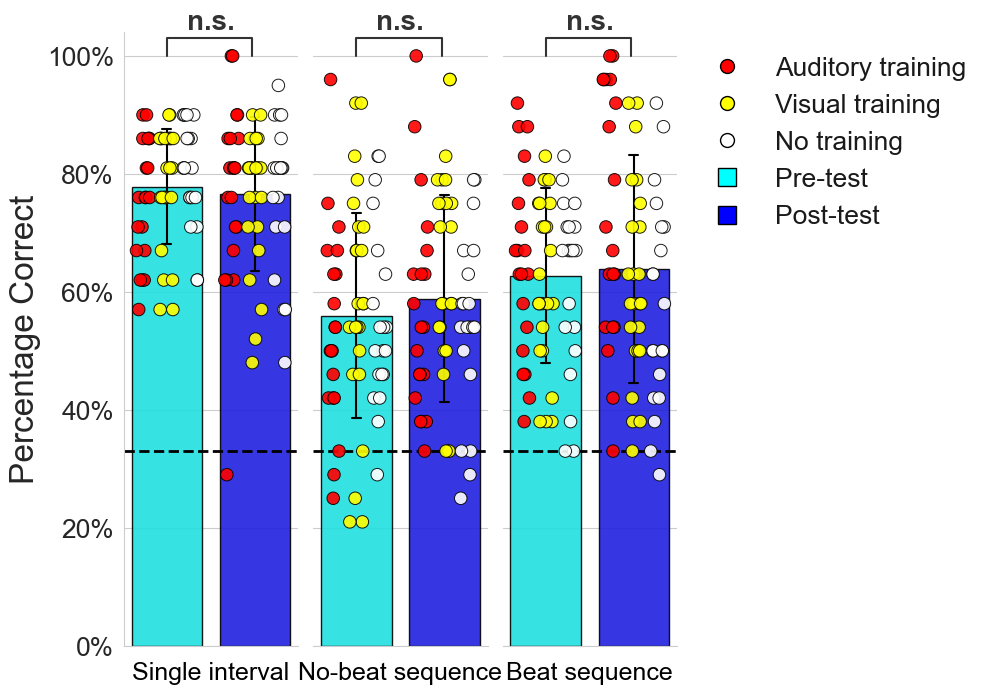

In [20]:
sns.set_style('whitegrid')
plt.figure(figsize=(3,4))
############# plot #############
g=sns.catplot(data=df1, kind='bar', x='Time', y='value',col='Timing_level',ci = "sd", 
              palette=['cyan','blue'],edgecolor="black",
               errcolor="black", errwidth=1.5, capsize = 0.1, height=7, aspect=0.3,alpha=0.9,
              legend=False, sharey=True, sharex=True, margin_titles=False)

g.map(sns.stripplot,'Time','value',hue=df1['group'],hue_order=['aud','vis','notrain'],palette=['red','yellow','white'], dodge=True,
       jitter=0.25,alpha=0.9, edgecolor='k', linewidth=0.7, size=9)

############ Aestetics ###############
g.fig.tight_layout()
g.set_axis_labels("","Percentage Correct",size=24)
g.set_titles('')
g.axes[0,0].set_xlabel('Single interval',color='black',alpha=1,size=18)
g.axes[0,1].set_xlabel('No-beat sequence',color='black',alpha=1,size=18)
g.axes[0,2].set_xlabel('Beat sequence',color='black',alpha=1,size=18)
g.set_titles(row_template='{row_name}',col_template='{col_name}')
g.set_titles("")
sns.despine(ax=g.axes[0, 1], left=True)
sns.despine(ax=g.axes[0, 2], left=True)
g.set_xticklabels([]) # makes labels for each bar disappers
g.set_yticklabels(size=19)
g.axes[0,0].axhline(y=0.33, color='black', linestyle='--',lw=2)
g.axes[0,1].axhline(y=0.33, color='black', linestyle='--',lw=2)
g.axes[0,2].axhline(y=0.33, color='black', linestyle='--',lw=2)
# g.fig.suptitle("Performance in auditory modality", y=1.03,size=20)  

############## legend ################
new_labels = ['Auditory training', 'Visual training', 'No training','Pre-test', 'Post-test']
handles_swarm, labels_swarm = g.axes[0, 0].get_legend_handles_labels()

# Create a legend with custom icon colors
legend_colors = ['red','yellow','white', 'cyan','blue']  # Replace with your desired colors

custom_handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markeredgecolor='black', markersize=10) if idx < 3
    else plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markeredgecolor='black', markersize=13)
    for idx, color in enumerate(legend_colors)
]

dot_legend = plt.legend(custom_handles, new_labels, loc='upper left', bbox_to_anchor=(1, 1),
                        frameon=False, fontsize=19, labelcolor='0.1', title='')

# Optionally, set the legend text (labels) color
dot_legend.get_title().set_color('0.2')  
########### Statistical significance #################
max_val=1 #max(df1['value'])
g.axes[0,0].plot([0,0,0.97,0.97],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,0].text(x=0.5,y=max_val+0.045, s='n.s.',ha='center',size=20,weight='bold',color='0.2')

g.axes[0,1].plot([0,0,0.97,0.97],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,1].text(x=0.5,y=max_val+0.045, s='n.s.',ha='center',size=20,weight='bold',color='0.2')

g.axes[0,2].plot([0,0,0.97,0.97],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,2].text(x=0.5,y=max_val+0.045, s='n.s.',ha='center',size=20,weight='bold',color='0.2')

from matplotlib.ticker import PercentFormatter
g.axes[0, 0].set_ylim(0, 1.04)
g.axes[0, 0].yaxis.set_major_formatter(PercentFormatter(1.0, decimals=0))
plt.show()

In [21]:
df11=df1[df1['group']=='aud']
df12=df1[df1['group']=='vis']
df13=df1[df1['group']=='notrain']
individual_groups=[df11,df12,df13]

In [26]:
def make_plots(df,fixed_modality,modality,mod,color,star1,star2,star3):
    sns.set_style('whitegrid')
    plt.figure(figsize=(3,4))
    ############# plot #############
    g=sns.catplot(data=df, kind='bar', x='Time', y='value',col='Timing_level',errorbar='se', 
                  palette=['cyan','blue'],edgecolor="black",
                   errcolor="black", errwidth=2, capsize = 0.1, height=7, aspect=0.3,alpha=0.9,
                  legend=False, sharey=True, sharex=True, margin_titles=False)

    g.map(sns.stripplot,'Time','value',hue=df['group'],palette={mod: color}, dodge=True,
           jitter=0.15,alpha=0.9, edgecolor='k', linewidth=1.5, size=9)

    ############ Aestetics ###############
    g.fig.tight_layout()
    g.set_axis_labels("","Percentage Correct",size=28)
    g.set_titles('')
    g.axes[0,0].set_xlabel('single\ninterval',alpha=1,size=24)
    g.axes[0,1].set_xlabel('non-beat\nsequence',alpha=1,size=24)
    g.axes[0,2].set_xlabel('beat\nsequence',alpha=1,size=24)
    g.set_titles(row_template='{row_name}',col_template='{col_name}')
    g.set_titles("")
    sns.despine(ax=g.axes[0, 1], left=True)
    sns.despine(ax=g.axes[0, 2], left=True)
    g.set_xticklabels([]) # makes labels for each bar disappers
    g.set_yticklabels(size=19)
    g.axes[0,0].axhline(y=0.33, color='black', linestyle='--',lw=2)
    g.axes[0,1].axhline(y=0.33, color='black', linestyle='--',lw=2)
    g.axes[0,2].axhline(y=0.33, color='black', linestyle='--',lw=2)
#     g.fig.suptitle(f"Performance in {fixed_modality} modality", y=1.02,size=20)  

    ############## legend ################
#     new_labels = [f"{modality} training",'Pre-test', 'Post-test']
#     handles_swarm, labels_swarm = g.axes[0, 0].get_legend_handles_labels()

#     # Create a legend with custom icon colors
#     legend_colors = [color, 'cyan','blue']  # Replace with your desired colors

#     custom_handles = [
#         plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markeredgecolor='black', markersize=10) if idx < 1
#         else plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markeredgecolor='black', markersize=13)
#         for idx, color in enumerate(legend_colors)
#     ]

#     dot_legend = plt.legend(custom_handles, new_labels, loc='upper left', bbox_to_anchor=(1, 1),
#                             frameon=False, fontsize=15, labelcolor='0.1', title='')

#     # Optionally, set the legend text (labels) color
#     dot_legend.get_title().set_color('0.2')  
    
    ########### Statistical significance #################
    max_val=1 #max(df['value'])
    g.axes[0,0].plot([0,0,0.97,0.97],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
#     g.axes[0,0].plot([0,0,2,2],[max_val+0.05,max_val+0.08,max_val+0.08,max_val+0.05],lw=1.5,color='0.2',clip_on=False)
    g.axes[0,0].text(x=0.5,y=max_val+0.045, s=star1,ha='center',size=20,weight='bold',color='0.2')
#     g.axes[0,0].text(x=1,y=max_val+0.07, s='***',ha='center',size=20,weight='bold',color='0.2')
#     g.axes[0,0].plot([1.03,1.03,2,2],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
#     g.axes[0,0].text(x=1.5,y=max_val+0.02, s='***',ha='center',size=20,weight='bold',color='0.2')

    g.axes[0,1].plot([0,0,0.97,0.97],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
#     g.axes[0,1].plot([0,0,2,2],[max_val+0.05,max_val+0.08,max_val+0.08,max_val+0.05],lw=1.5,color='0.2',clip_on=False)
    g.axes[0,1].text(x=0.5,y=max_val+0.045, s=star2,ha='center',size=20,weight='bold',color='0.2')
#     g.axes[0,1].text(x=1,y=max_val+0.07, s='***',ha='center',size=20,weight='bold',color='0.2')
#     g.axes[0,1].plot([1.03,1.03,2,2],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
#     g.axes[0,1].text(x=1.5,y=max_val+0.02, s='***',ha='center',size=20,weight='bold',color='0.2')

    g.axes[0,2].plot([0,0,0.97,0.97],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
#     g.axes[0,2].plot([0,0,2,2],[max_val+0.05,max_val+0.08,max_val+0.08,max_val+0.05],lw=1.5,color='0.2',clip_on=False)
    g.axes[0,2].text(x=0.5,y=max_val+0.045, s=star3,ha='center',size=20,weight='bold',color='0.2')
#     g.axes[0,2].text(x=1,y=max_val+0.07, s='***',ha='center',size=20,weight='bold',color='0.2')
#     g.axes[0,2].plot([1.03,1.03,2,2],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
#     g.axes[0,2].text(x=1.5,y=max_val+0.04, s='n.s.',ha='center',size=15,weight='bold',color='0.2')

    from matplotlib.ticker import PercentFormatter
    g.axes[0, 0].set_ylim(0, 1.04)
    g.axes[0, 0].yaxis.set_major_formatter(PercentFormatter(1.0, decimals=0))
    plt.savefig(f'../plots/{fixed_modality}Performance_{modality}Train.png', bbox_inches='tight',dpi=250)
    plt.show()

<Figure size 300x400 with 0 Axes>

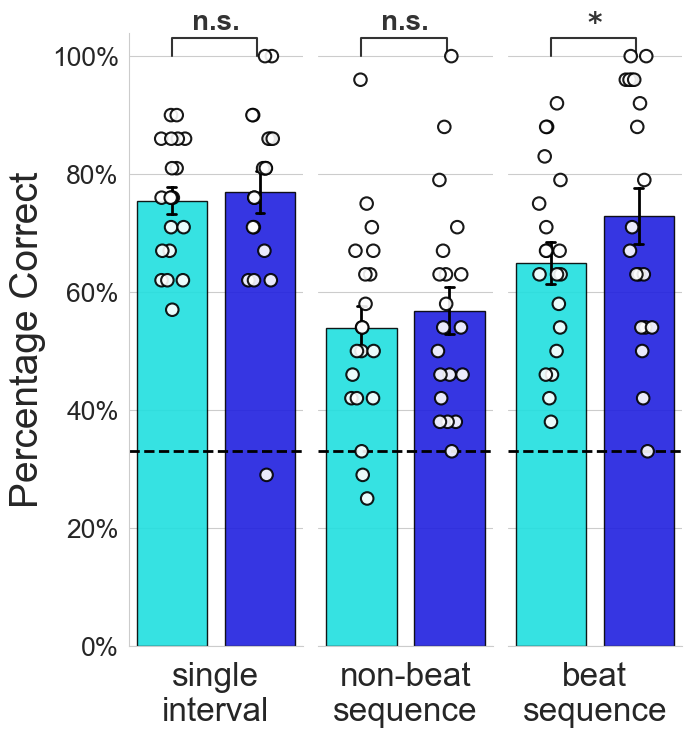

<Figure size 300x400 with 0 Axes>

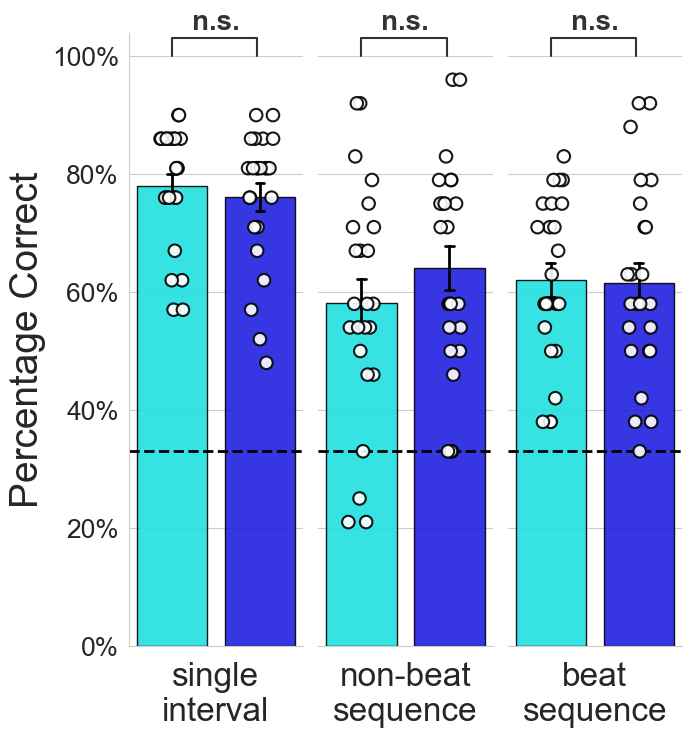

<Figure size 300x400 with 0 Axes>

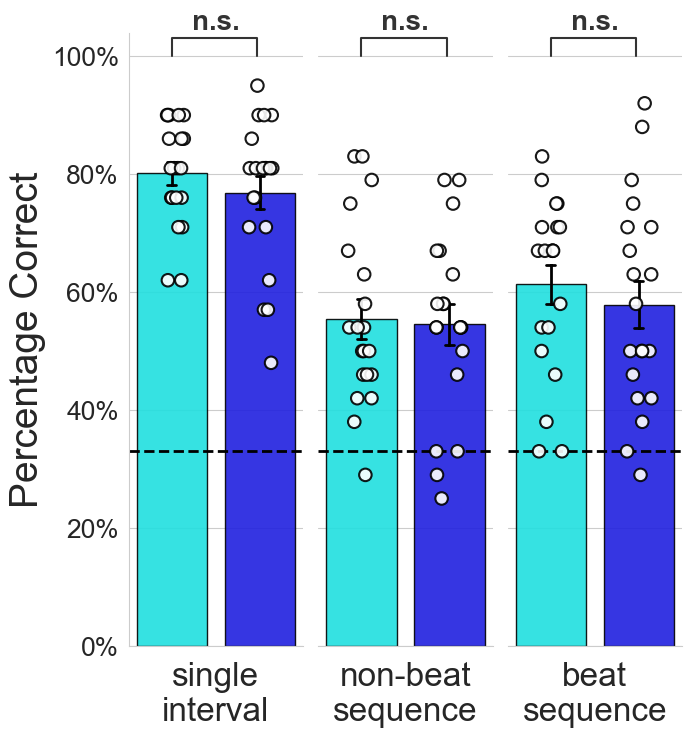

In [27]:
df11,df12,df13=df1[df1['group']=='aud'],df1[df1['group']=='vis'],df1[df1['group']=='notrain']
individual_groups=[df11,df12,df13]
modality=['Auditory','Visual','No']
mod=['aud','vis','notrain']
color=['white','white','white'] # change this to ['red','yellow','white'] to change the color of dots
stars=[['n.s.','n.s.',r'$\mathbf{*}$'],['n.s.','n.s.','n.s.'],['n.s.','n.s.','n.s.']]

for group, modality, mod, color,starlist in zip(individual_groups, modality, mod, color,stars):
    make_plots(group,'Auditory',modality, mod, color,*starlist)


# Performance in visual modality

In [11]:
print(df[df['Time']=='Pre']['VisSD'].mean())
print(df[df['Time']=='Post']['VisSD'].mean())
print(df[df['Time']=='Pre']['VisIrreg'].mean())
print(df[df['Time']=='Post']['VisIrreg'].mean())
print(df[df['Time']=='Pre']['VisReg'].mean())
print(df[df['Time']=='Post']['VisReg'].mean())

0.66359375
0.6559375000000001
0.54609375
0.5812499999999999
0.4559375
0.52390625


In [33]:
t_statistic, p_value = ttest_rel(df.query("Time=='Pre'and group=='aud'")['VisSD'], df.query("Time=='Post'and group=='aud'")['VisSD'])
print(t_statistic)
display(p_value)
t_statistic, p_value = ttest_rel(df.query("Time=='Pre'and group=='aud'")['VisIrreg'], df.query("Time=='Post'and group=='aud'")['VisIrreg'])
print(t_statistic)
print(p_value)
t_statistic, p_value = ttest_rel(df.query("Time=='Pre'and group=='aud'")['VisReg'], df.query("Time=='Post'and group=='aud'")['VisReg'])
print(t_statistic)
print(p_value)

-0.8041124664117226


0.431278616901582

-0.6407878255148849
0.5293142121660646
-0.9819339220494573
0.33847160022666667


In [35]:
from scipy.stats import ttest_rel
t_statistic, p_value = ttest_rel(df.query("Time=='Pre'and group=='vis'")['VisSD'], df.query("Time=='Post'and group=='vis'")['VisSD'])
print(t_statistic)
print(p_value)
t_statistic, p_value = ttest_rel(df.query("Time=='Pre'and group=='vis'")['VisIrreg'], df.query("Time=='Post'and group=='vis'")['VisIrreg'])
print(t_statistic)
print(p_value)
t_statistic, p_value = ttest_rel(df.query("Time=='Pre'and group=='vis'")['VisReg'], df.query("Time=='Post'and group=='vis'")['VisReg'])
print(t_statistic)
print(p_value)

1.5276240718106873
0.14024244370046693
-0.4508885221497186
0.656292049540685
-3.8028537171708194
0.0009167208214500277


In [37]:
t_statistic, p_value = ttest_rel(df.query("Time=='Pre'and group=='notrain'")['VisSD'], df.query("Time=='Post'and group=='notrain'")['VisSD'])
print(t_statistic)
print(p_value)
t_statistic, p_value = ttest_rel(df.query("Time=='Pre'and group=='notrain'")['VisIrreg'], df.query("Time=='Post'and group=='notrain'")['VisIrreg'])
print(t_statistic)
print(p_value)
t_statistic, p_value = ttest_rel(df.query("Time=='Pre'and group=='notrain'")['VisReg'], df.query("Time=='Post'and group=='notrain'")['VisReg'])
print(t_statistic)
print(p_value)

-0.15667320488625658
0.8771552190072399
-2.0730518146708334
0.05201084682858992
-1.2999936911445822
0.20915361920331949


In [39]:
t_statistic, p_value = ttest_rel(df[df['Time']=='Pre']['VisSD'], df[df['Time']=='Post']['VisSD'])
print(t_statistic)
display(p_value)
t_statistic, p_value = ttest_rel(df[df['Time']=='Pre']['VisIrreg'], df[df['Time']=='Post']['VisIrreg'])
print(t_statistic)
print(p_value)
t_statistic, p_value = ttest_rel(df[df['Time']=='Pre']['VisReg'], df[df['Time']=='Post']['VisReg'])
print(t_statistic)
print(p_value)

0.4046604634304482


0.687097770071774

-1.6760469858400655
0.09868541849241093
-3.5077621633405656
0.0008394482061278994


In [12]:
dfvis=df.melt(['Time','group'],['VisSD','VisIrreg','VisReg'],var_name='Timing_level',value_name='value')
dfvis

,Time,group,Timing_level,value
0,Pre,aud,VisSD,0.71
1,Post,aud,VisSD,0.62
2,Pre,vis,VisSD,0.43
3,Post,vis,VisSD,0.29
4,Pre,notrain,VisSD,0.57
...,...,...,...,...
379,Post,aud,VisReg,0.75
380,Pre,notrain,VisReg,0.38
381,Post,notrain,VisReg,0.46
382,Pre,notrain,VisReg,0.54


<Figure size 300x400 with 0 Axes>

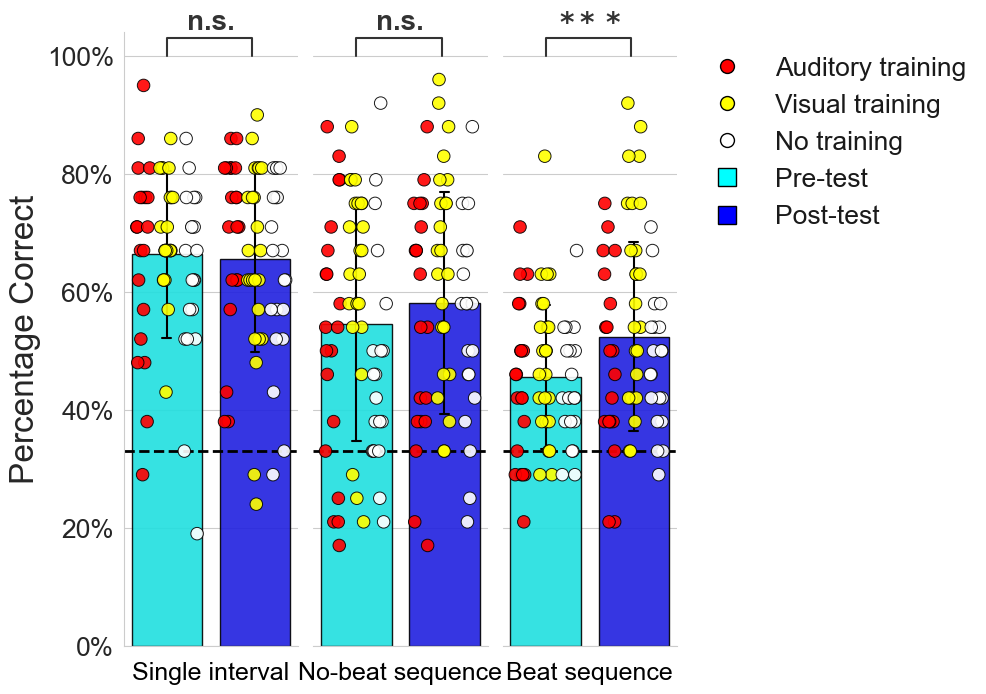

In [13]:
sns.set_style('whitegrid')
plt.figure(figsize=(3,4))
############# plot #############
g=sns.catplot(data=dfvis, kind='bar', x='Time', y='value',col='Timing_level',ci = "sd", 
              palette=['cyan','blue'],edgecolor="black",
               errcolor="black", errwidth=1.5, capsize = 0.1, height=7, aspect=0.3,alpha=0.9,
              legend=False, sharey=True, sharex=True, margin_titles=False)

g.map(sns.stripplot,'Time','value',hue=dfvis['group'],hue_order=['aud','vis','notrain'],palette=['red','yellow','white'], dodge=True,
       jitter=0.25, alpha=0.9, edgecolor='k', linewidth=0.7, size=9)

############ Aestetics ###############
g.fig.tight_layout()
g.set_axis_labels("","Percentage Correct",size=24)
g.set_titles('')
g.axes[0,0].set_xlabel('Single interval',color='black',alpha=1,size=18)
g.axes[0,1].set_xlabel('No-beat sequence',color='black',alpha=1,size=18)
g.axes[0,2].set_xlabel('Beat sequence',color='black',alpha=1,size=18)
g.set_titles(row_template='{row_name}',col_template='{col_name}')
g.set_titles("")
sns.despine(ax=g.axes[0, 1], left=True)
sns.despine(ax=g.axes[0, 2], left=True)
g.set_xticklabels([]) # makes labels for each bar disappers
g.set_yticklabels(size=19)
g.axes[0,0].axhline(y=0.33, color='black', linestyle='--',lw=2)
g.axes[0,1].axhline(y=0.33, color='black', linestyle='--',lw=2)
g.axes[0,2].axhline(y=0.33, color='black', linestyle='--',lw=2)
# g.fig.suptitle("Performance in visual modality", y=1.02,size=16)  

############## legend ################
new_labels = ['Auditory training', 'Visual training', 'No training','Pre-test', 'Post-test']
handles_swarm, labels_swarm = g.axes[0, 0].get_legend_handles_labels()

# Create a legend with custom icon colors
legend_colors = ['red','yellow','white', 'cyan','blue']  # Replace with your desired colors

custom_handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markeredgecolor='black', markersize=10) if idx < 3
    else plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markeredgecolor='black', markersize=13)
    for idx, color in enumerate(legend_colors)
]

dot_legend = plt.legend(custom_handles, new_labels, loc='upper left', bbox_to_anchor=(1, 1),
                        frameon=False, fontsize=19, labelcolor='0.1', title='')

# Optionally, set the legend text (labels) color
dot_legend.get_title().set_color('0.2')  
########### Statistical significance #################
max_val=1 #max(dfvis['value'])
g.axes[0,0].plot([0,0,0.97,0.97],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,0].text(x=0.5,y=max_val+0.045, s='n.s.',ha='center',size=20,weight='bold',color='0.2')

g.axes[0,1].plot([0,0,0.97,0.97],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,1].text(x=0.5,y=max_val+0.045, s='n.s.',ha='center',size=20,weight='bold',color='0.2')

g.axes[0,2].plot([0,0,0.97,0.97],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,2].text(x=0.5,y=max_val+0.045, s=r'$\mathbf{***}$',ha='center',size=20,weight='bold',color='0.2')

from matplotlib.ticker import PercentFormatter
g.axes[0, 0].set_ylim(0, 1.04)
g.axes[0, 0].yaxis.set_major_formatter(PercentFormatter(1.0, decimals=0))

plt.show()

<Figure size 300x400 with 0 Axes>

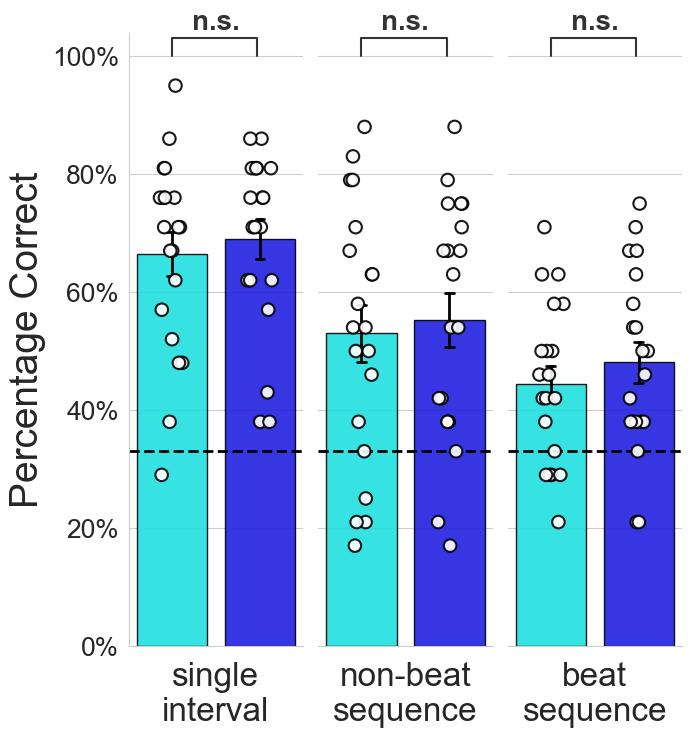

<Figure size 300x400 with 0 Axes>

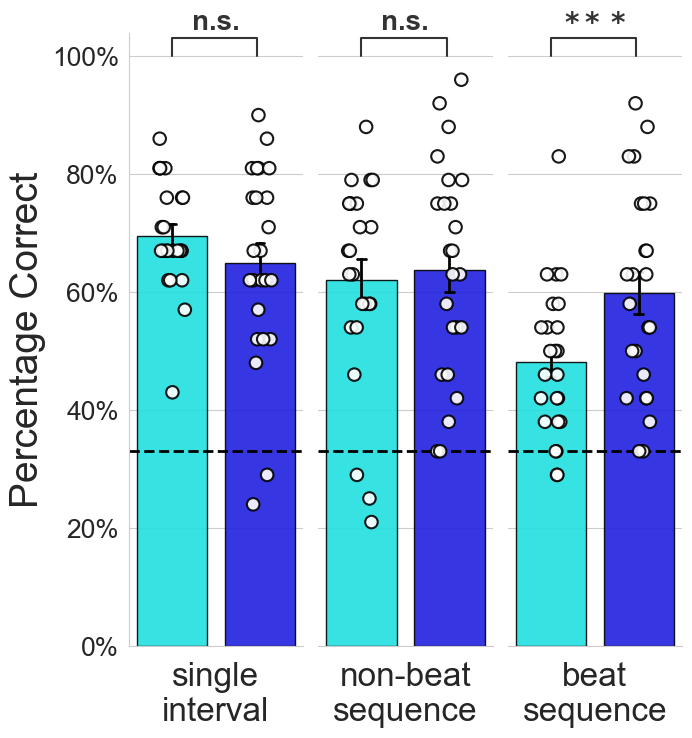

<Figure size 300x400 with 0 Axes>

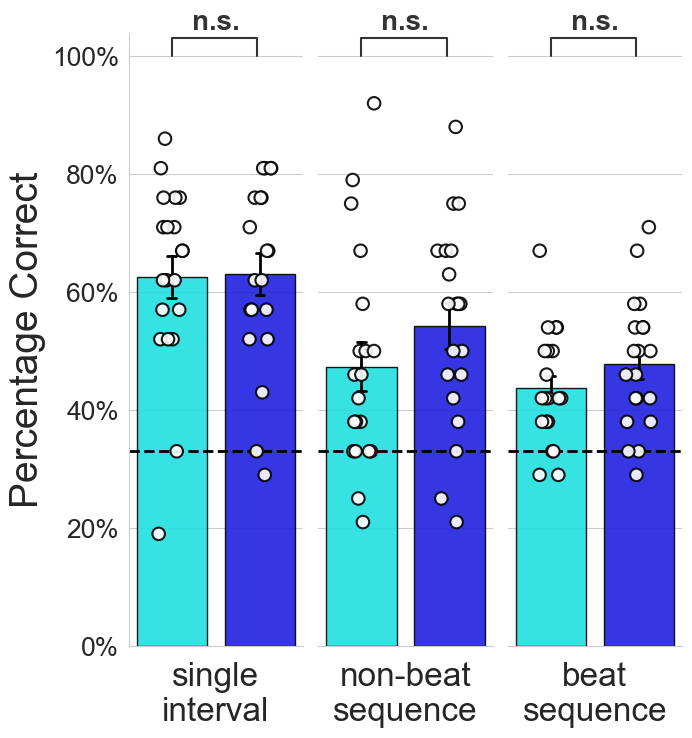

In [42]:
dfvis1,dfvis2,dfvis3=dfvis[dfvis['group']=='aud'],dfvis[dfvis['group']=='vis'],dfvis[dfvis['group']=='notrain']
individual_groups=[dfvis1,dfvis2,dfvis3]
modality=['Auditory','Visual','No']
mod=['aud','vis','notrain']
color=['white','white','white'] #['red','yellow','white']
stars=[['n.s.','n.s.','n.s.'],['n.s.','n.s.',r'$\mathbf{***}$'],['n.s.','n.s.','n.s.']]

for group, modality, mod, color, starlist in zip(individual_groups, modality, mod, color, stars):
    make_plots(group,'Visual',modality, mod, color, *starlist)


# Performance in tactile modality

In [43]:
print(df.query("Time=='Pre'and group=='aud'")['TactSD'].mean())
print(df.query("Time=='Post'and group=='aud'")['TactSD'].mean())
print(df.query("Time=='Pre'and group=='aud'")['TactIrreg'].mean())
print(df.query("Time=='Post'and group=='aud'")['TactIrreg'].mean())
print(df.query("Time=='Pre'and group=='aud'")['TactReg'].mean())
print(df.query("Time=='Post'and group=='aud'")['TactReg'].mean())

0.7295
0.723
0.4965
0.553
0.45099999999999996
0.6295000000000001


In [44]:
## running paired t-test
from scipy.stats import ttest_rel
t_statistic, p_value = ttest_rel(df.query("Time=='Pre'and group=='aud'")['TactSD'], df.query("Time=='Post'and group=='aud'")['TactSD'])
print(t_statistic)
display(p_value)
t_statistic, p_value = ttest_rel(df.query("Time=='Pre'and group=='aud'")['TactIrreg'], df.query("Time=='Post'and group=='aud'")['TactIrreg'])
print(t_statistic)
print(p_value)
t_statistic, p_value = ttest_rel(df.query("Time=='Pre'and group=='aud'")['TactReg'], df.query("Time=='Post'and group=='aud'")['TactReg'])
print(t_statistic)
print(p_value)

0.23177943072138527


0.819187333768539

-1.8452693236836855
0.08064308714858145
-5.1223038961481455
6.054226089023378e-05


In [46]:
from scipy.stats import ttest_rel
t_statistic, p_value = ttest_rel(df.query("Time=='Pre'and group=='vis'")['TactSD'], df.query("Time=='Post'and group=='vis'")['TactSD'])
print(t_statistic)
print(p_value)
t_statistic, p_value = ttest_rel(df.query("Time=='Pre'and group=='vis'")['TactIrreg'], df.query("Time=='Post'and group=='vis'")['TactIrreg'])
print(t_statistic)
print(p_value)
t_statistic, p_value = ttest_rel(df.query("Time=='Pre'and group=='vis'")['TactReg'], df.query("Time=='Post'and group=='vis'")['TactReg'])
print(t_statistic)
print(p_value)

0.6992966774554988
0.4913788380636266
-0.603379016054244
0.5521611171432244
-0.6278580573434219
0.5362816889742655


In [48]:
t_statistic, p_value = ttest_rel(df.query("Time=='Pre'and group=='notrain'")['TactSD'], df.query("Time=='Post'and group=='notrain'")['TactSD'])
print(t_statistic)
print(p_value)
t_statistic, p_value = ttest_rel(df.query("Time=='Pre'and group=='notrain'")['TactIrreg'], df.query("Time=='Post'and group=='notrain'")['TactIrreg'])
print(t_statistic)
print(p_value)
t_statistic, p_value = ttest_rel(df.query("Time=='Pre'and group=='notrain'")['TactReg'], df.query("Time=='Post'and group=='notrain'")['TactReg'])
print(t_statistic)
print(p_value)

-0.557210876917189
0.58388862736816
0.4881458234362928
0.6310324059728145
-1.6501302785858252
0.11535039850453724


In [50]:
## running paired t-test
from scipy.stats import ttest_rel
t_statistic, p_value = ttest_rel(df[df['Time']=='Pre']['TactSD'], df[df['Time']=='Post']['TactSD'])
print(t_statistic)
display(p_value)
t_statistic, p_value = ttest_rel(df[df['Time']=='Pre']['TactIrreg'], df[df['Time']=='Post']['TactIrreg'])
print(t_statistic)
print(p_value)
t_statistic, p_value = ttest_rel(df[df['Time']=='Pre']['TactReg'], df[df['Time']=='Post']['TactReg'])
print(t_statistic)
print(p_value)

0.26384324829054884


0.7927618420901733

-1.1923779849459186
0.23758496467795126
-4.006024746255017
0.00016565820417881736


In [14]:
dftact=df.melt(['Time','group'],['TactSD','TactIrreg','TactReg'],var_name='Timing_level',value_name='value')
dftact

,Time,group,Timing_level,value
0,Pre,aud,TactSD,0.76
1,Post,aud,TactSD,0.67
2,Pre,vis,TactSD,0.71
3,Post,vis,TactSD,0.62
4,Pre,notrain,TactSD,0.76
...,...,...,...,...
379,Post,aud,TactReg,0.88
380,Pre,notrain,TactReg,0.33
381,Post,notrain,TactReg,0.63
382,Pre,notrain,TactReg,0.50


<Figure size 300x1500 with 0 Axes>

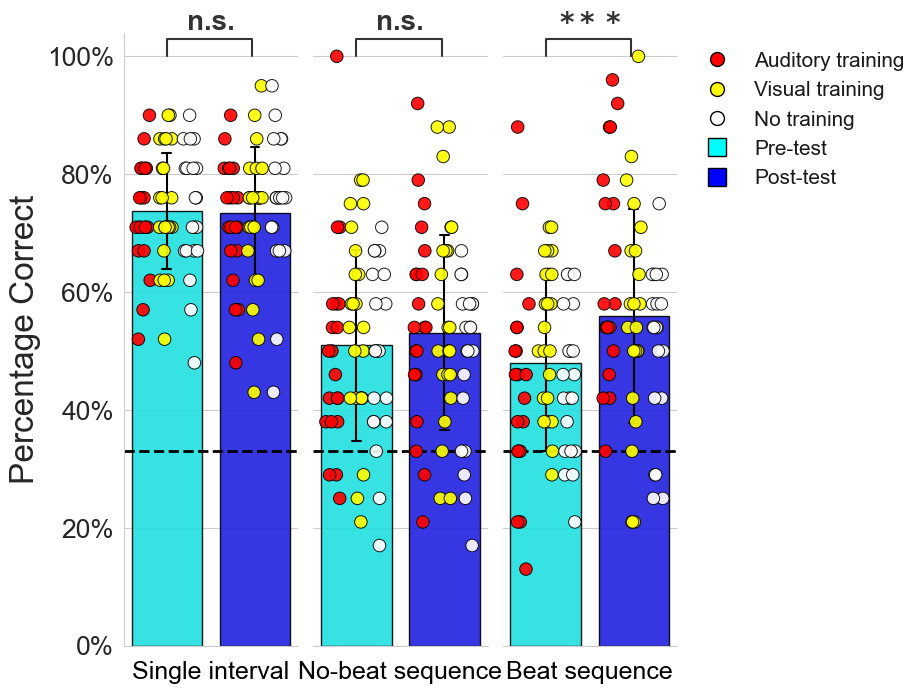

In [52]:
sns.set_style('whitegrid')
plt.figure(figsize=(3,15))
############# plot #############
g=sns.catplot(data=dftact, kind='bar', x='Time', y='value',col='Timing_level',ci = "sd", 
              palette=['cyan','blue'],edgecolor="black",
               errcolor="black", errwidth=1.5, capsize = 0.1, height=7, aspect=0.3,alpha=0.9,
              legend=False, sharey=True, sharex=True, margin_titles=False)

g.map(sns.stripplot,'Time','value',hue=dftact['group'],hue_order=['aud','vis','notrain'],palette=['red','yellow','white'], dodge=True,
       jitter=0.25,alpha=0.9, edgecolor='k', linewidth=0.7, size=9)

############ Aestetics ###############
g.fig.tight_layout()
g.set_axis_labels("","Percentage Correct",size=24)
g.set_titles('')
g.axes[0,0].set_xlabel('Single interval',color='black',alpha=1,size=18)
g.axes[0,1].set_xlabel('No-beat sequence',color='black',alpha=1,size=18)
g.axes[0,2].set_xlabel('Beat sequence',color='black',alpha=1,size=18)
g.set_titles(row_template='{row_name}',col_template='{col_name}')
g.set_titles("")
sns.despine(ax=g.axes[0, 1], left=True)
sns.despine(ax=g.axes[0, 2], left=True)
g.set_xticklabels([]) # makes labels for each bar disappers
g.set_yticklabels(size=19)
g.axes[0,0].axhline(y=0.33, color='black', linestyle='--',lw=2)
g.axes[0,1].axhline(y=0.33, color='black', linestyle='--',lw=2)
g.axes[0,2].axhline(y=0.33, color='black', linestyle='--',lw=2)
# g.fig.suptitle("Performance in tactile modality", y=1.02,size=16)  

############## legend ################
new_labels = ['Auditory training', 'Visual training', 'No training','Pre-test', 'Post-test']
handles_swarm, labels_swarm = g.axes[0, 0].get_legend_handles_labels()

# Create a legend with custom icon colors
legend_colors = ['red','yellow','white', 'cyan','blue']  # Replace with your desired colors

custom_handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markeredgecolor='black', markersize=10) if idx < 3
    else plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markeredgecolor='black', markersize=13)
    for idx, color in enumerate(legend_colors)
]

dot_legend = plt.legend(custom_handles, new_labels, loc='upper left', bbox_to_anchor=(1, 1),
                        frameon=False, fontsize=15, labelcolor='0.1', title='')

# Optionally, set the legend text (labels) color
dot_legend.get_title().set_color('0.2')  
########### Statistical significance #################
max_val=1 #max(dfvis['value'])
g.axes[0,0].plot([0,0,0.97,0.97],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,0].text(x=0.5,y=max_val+0.045, s='n.s.',ha='center',size=20,weight='bold',color='0.2')

g.axes[0,1].plot([0,0,0.97,0.97],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,1].text(x=0.5,y=max_val+0.045, s='n.s.',ha='center',size=20,weight='bold',color='0.2')

g.axes[0,2].plot([0,0,0.97,0.97],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,2].text(x=0.5,y=max_val+0.045, s=r'$\mathbf{***}$',ha='center',size=20,weight='bold',color='0.2')
from matplotlib.ticker import PercentFormatter
g.axes[0, 0].set_ylim(0, 1.04)
g.axes[0, 0].yaxis.set_major_formatter(PercentFormatter(1.0, decimals=0))

# max_val=max(dftact['value']+20)

plt.show()

<Figure size 300x400 with 0 Axes>

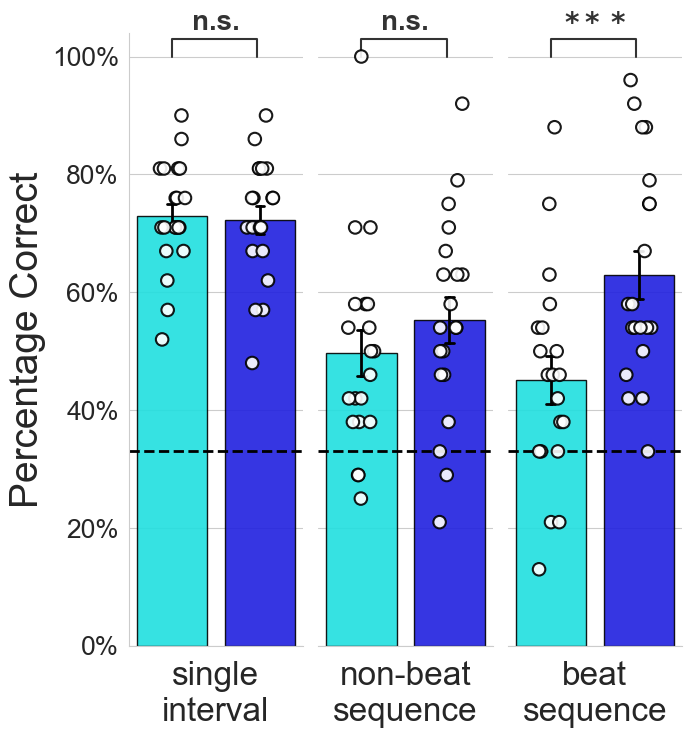

<Figure size 300x400 with 0 Axes>

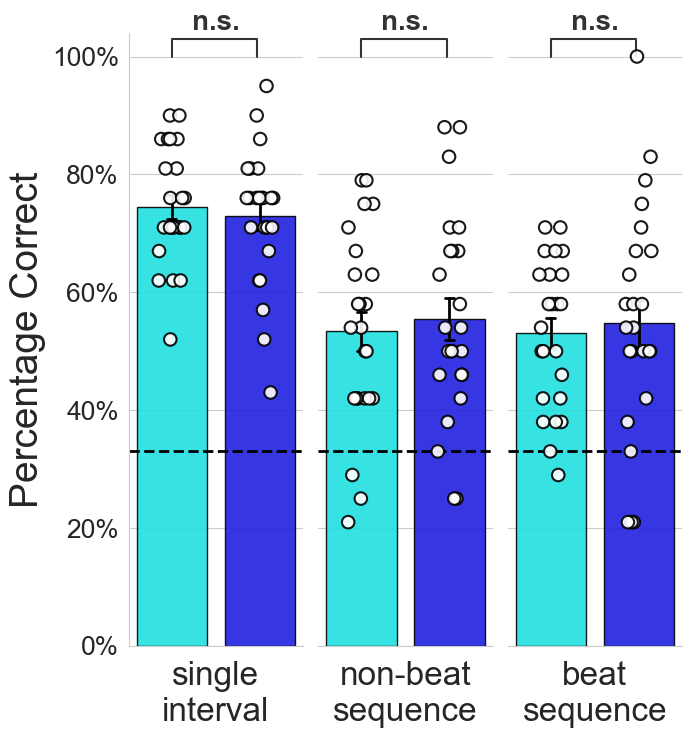

<Figure size 300x400 with 0 Axes>

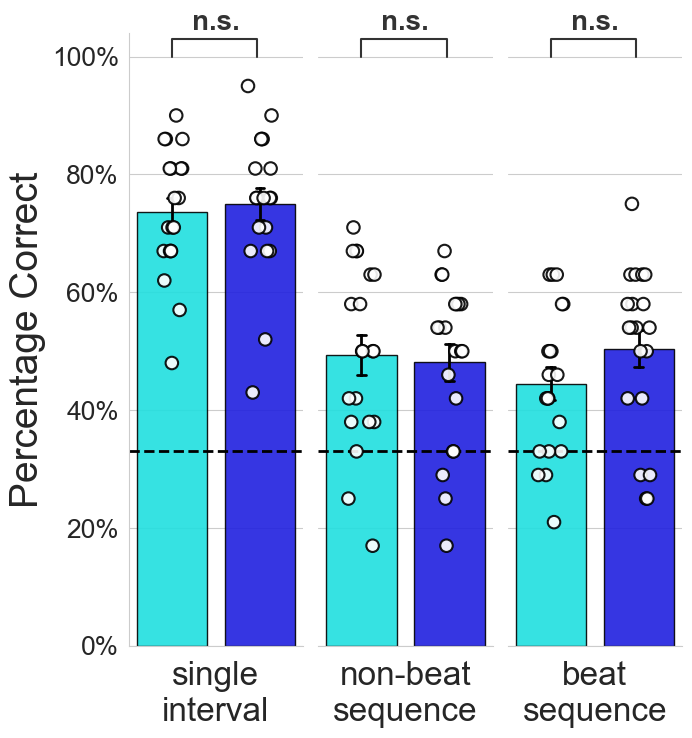

In [53]:
dftact1,dftact2,dftact3=dftact[dftact['group']=='aud'],dftact[dftact['group']=='vis'],dftact[dftact['group']=='notrain']
individual_groups=[dftact1,dftact2,dftact3]
modality=['Auditory','Visual','No']
mod=['aud','vis','notrain']
color=['white','white','white'] #['red','yellow','white']
stars=[['n.s.','n.s.',r'$\mathbf{***}$'],['n.s.','n.s.','n.s.'],['n.s.','n.s.','n.s.']]

for group, modality, mod, color, starlist in zip(individual_groups, modality, mod, color, stars):
    make_plots(group,'Tactile',modality, mod, color, *starlist)

# <span style='background:yellow'>Changes from pre to post in beat timing as a function of modality and training group 

In [15]:
df=pd.read_excel('../pre-post_experiment/results/PreprocessedResults_NoOutliers.xlsx')
df=df.iloc[:,[0,11,12,13,14,15,16,17,18,19]]
df.rename(lambda x:x.replace('.1',''),axis='columns',inplace=True)
def specify_group(x):
    parts=x.split('_')[1]
    if parts == 'audtrain1':
        return 'aud'
    elif parts == 'audtrain2':
        return 'aud'
    elif parts == 'vistrain1':
        return 'vis'
    elif parts == 'vistrain2':
        return 'vis'
    elif parts == 'notrain':
        return 'notrain'
def specify_time(x):
    if x.split('_')[2] == 'post':
        return 'Post'
    else:
        return 'Pre'
df['group']=df['Name'].apply(specify_group)
df['Time']=df['Name'].apply(specify_time)
df

,Name,AudSD,AudIrreg,AudReg,VisSD,VisIrreg,VisReg,TactSD,TactIrreg,TactReg,group,Time
0,train10_audtrain2_2023-11-09,0.86,0.54,0.83,0.71,0.79,0.63,0.76,0.71,0.63,aud,Pre
1,train10_audtrain2_post_2023-11-23,0.86,0.46,0.96,0.62,0.67,0.50,0.67,0.63,0.88,aud,Post
2,train11_vistrain2_2023-11-09,0.57,0.33,0.50,0.43,0.46,0.29,0.71,0.21,0.42,vis,Pre
3,train11_vistrain2_post_2023-11-23,0.76,0.58,0.50,0.29,0.42,0.42,0.62,0.46,0.21,vis,Post
4,train14_notrain_2023-11-10,0.81,0.29,0.46,0.57,0.50,0.33,0.76,0.38,0.29,notrain,Pre
...,...,...,...,...,...,...,...,...,...,...,...,...
123,train81_audtrain1_post_2024-03-30,1.00,0.88,0.96,0.81,0.75,0.75,0.90,0.67,0.88,aud,Post
124,train8_notrain_2023-11-07,0.62,0.83,0.67,0.76,0.38,0.38,0.76,0.58,0.33,notrain,Pre
125,train8_notrain_post_2023-11-21,0.71,0.54,0.63,0.76,0.67,0.46,0.76,0.46,0.63,notrain,Post
126,train9_notrain_2023-11-08,0.90,0.50,0.54,0.71,0.50,0.54,0.71,0.63,0.50,notrain,Pre


In [16]:
dfBeat=df[df['group']=='aud'].melt(['Time','group'],['AudReg','VisReg','TactReg'],var_name='Timing_level',value_name='value')
dfBeat

,Time,group,Timing_level,value
0,Pre,aud,AudReg,0.83
1,Post,aud,AudReg,0.96
2,Pre,aud,AudReg,0.63
3,Post,aud,AudReg,0.54
4,Pre,aud,AudReg,0.88
...,...,...,...,...
115,Post,aud,TactReg,0.67
116,Pre,aud,TactReg,0.33
117,Post,aud,TactReg,0.54
118,Pre,aud,TactReg,0.33


<Figure size 300x400 with 0 Axes>

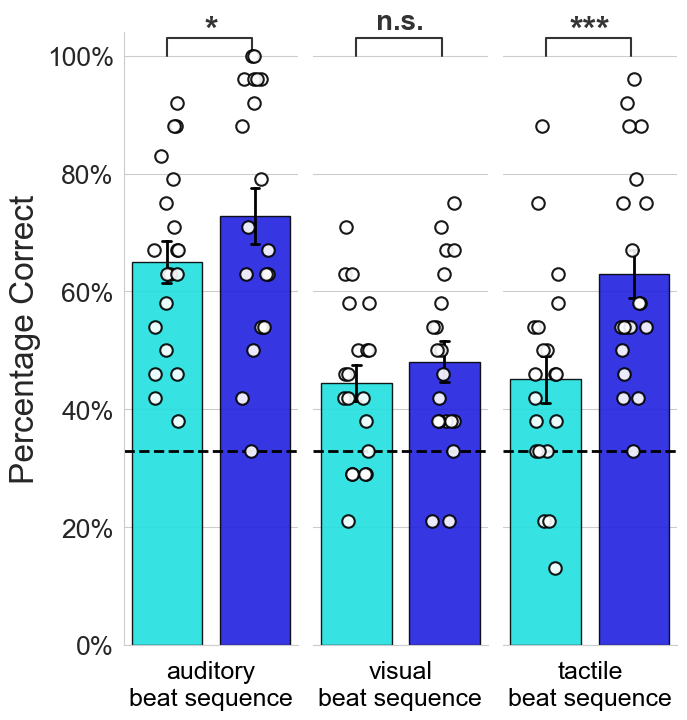

In [20]:
sns.set_style('whitegrid')
plt.figure(figsize=(3,4))
############# plot #############
g=sns.catplot(data=dfBeat, kind='bar', x='Time', y='value',col='Timing_level',errorbar='se', 
              palette=['cyan','blue'],edgecolor="black",
               errcolor="black", errwidth=2, capsize = 0.1, height=7, aspect=0.3,alpha=0.9,
              legend=False, sharey=True, sharex=True, margin_titles=False)

g.map(sns.stripplot,'Time','value',dodge=True,color='white',jitter=0.15,alpha=0.9, edgecolor='k', linewidth=1.5, size=9) #hue=dfBeat['group'],hue_order=['aud','vis','notrain'],palette=['red','yellow','white'], 

# g.map(sns.stripplot,'Time','value',hue=df['group'],palette={mod: color}, dodge=True,
#            jitter=0.15,alpha=0.9, edgecolor='k', linewidth=1.5, size=9)
############ Aestetics ###############
g.fig.tight_layout()
g.set_axis_labels("","Percentage Correct",size=24)
g.set_titles('')
g.axes[0,0].set_xlabel('auditory\nbeat sequence',color='black',alpha=1,size=18)
g.axes[0,1].set_xlabel('visual\nbeat sequence',color='black',alpha=1,size=18)
g.axes[0,2].set_xlabel('tactile\nbeat sequence',color='black',alpha=1,size=18)
g.set_titles(row_template='{row_name}',col_template='{col_name}')
g.set_titles("")
sns.despine(ax=g.axes[0, 1], left=True)
sns.despine(ax=g.axes[0, 2], left=True)
g.set_xticklabels([]) # makes labels for each bar disappers
g.set_yticklabels(size=19)
g.axes[0,0].axhline(y=0.33, color='black', linestyle='--',lw=2)
g.axes[0,1].axhline(y=0.33, color='black', linestyle='--',lw=2)
g.axes[0,2].axhline(y=0.33, color='black', linestyle='--',lw=2)
########### Statistical significance #################
max_val=1 #max(df1['value'])
g.axes[0,0].plot([0,0,0.97,0.97],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,0].text(x=0.5,y=max_val+0.025, s='*',ha='center',size=25,weight='bold',color='0.2')

g.axes[0,1].plot([0,0,0.97,0.97],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,1].text(x=0.5,y=max_val+0.045, s='n.s.',ha='center',size=20,weight='bold',color='0.2')

g.axes[0,2].plot([0,0,0.97,0.97],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,2].text(x=0.5,y=max_val+0.025, s='***',ha='center',size=25,weight='bold',color='0.2')

from matplotlib.ticker import PercentFormatter
g.axes[0, 0].set_ylim(0, 1.04)
g.axes[0, 0].yaxis.set_major_formatter(PercentFormatter(1.0, decimals=0))
plt.savefig('../plots/beat performance_aud train.png', bbox_inches='tight',dpi=250)
plt.show()

In [18]:
dfBeatvis=df[df['group']=='vis'].melt(['Time','group'],['AudReg','VisReg','TactReg'],var_name='Timing_level',value_name='value')#[df['group']=='aud']
dfBeatvis

,Time,group,Timing_level,value
0,Pre,vis,AudReg,0.50
1,Post,vis,AudReg,0.50
2,Pre,vis,AudReg,0.63
3,Post,vis,AudReg,0.50
4,Pre,vis,AudReg,0.58
...,...,...,...,...
139,Post,vis,TactReg,0.67
140,Pre,vis,TactReg,0.58
141,Post,vis,TactReg,0.63
142,Pre,vis,TactReg,0.29


<Figure size 300x400 with 0 Axes>

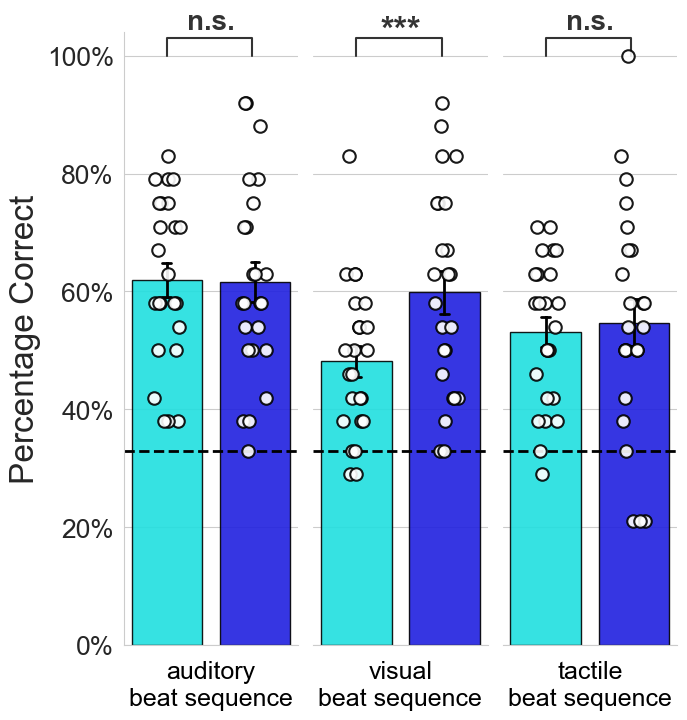

In [21]:
sns.set_style('whitegrid')
plt.figure(figsize=(3,4))
############# plot #############
g=sns.catplot(data=dfBeatvis, kind='bar', x='Time', y='value',col='Timing_level',errorbar='se', 
              palette=['cyan','blue'],edgecolor="black",
               errcolor="black", errwidth=2, capsize = 0.1, height=7, aspect=0.3,alpha=0.9,
              legend=False, sharey=True, sharex=True, margin_titles=False)

g.map(sns.stripplot,'Time','value',dodge=True,color='white',jitter=0.15,alpha=0.9, ec='k', linewidth=1.5, size=9) #hue=dfBeatvis['group'],hue_order=['aud','vis','notrain'],palette=['red','yellow','white'], 
############ Aestetics ###############
g.fig.tight_layout()
g.set_axis_labels("","Percentage Correct",size=24)
g.set_titles('')
g.axes[0,0].set_xlabel('auditory\nbeat sequence',color='black',alpha=1,size=18)
g.axes[0,1].set_xlabel('visual\nbeat sequence',color='black',alpha=1,size=18)
g.axes[0,2].set_xlabel('tactile\nbeat sequence',color='black',alpha=1,size=18)
g.set_titles(row_template='{row_name}',col_template='{col_name}')
g.set_titles("")
sns.despine(ax=g.axes[0, 1], left=True)
sns.despine(ax=g.axes[0, 2], left=True)
g.set_xticklabels([]) # makes labels for each bar disappers
g.set_yticklabels(size=19)
g.axes[0,0].axhline(y=0.33, color='black', linestyle='--',lw=2)
g.axes[0,1].axhline(y=0.33, color='black', linestyle='--',lw=2)
g.axes[0,2].axhline(y=0.33, color='black', linestyle='--',lw=2)
########### Statistical significance #################
max_val=1 #max(df1['value'])
g.axes[0,0].plot([0,0,0.97,0.97],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,0].text(x=0.5,y=max_val+0.045, s='n.s.',ha='center',size=20,weight='bold',color='0.2')

g.axes[0,1].plot([0,0,0.97,0.97],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,1].text(x=0.5,y=max_val+0.025, s='***',ha='center',size=25,weight='bold',color='0.2')

g.axes[0,2].plot([0,0,0.97,0.97],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,2].text(x=0.5,y=max_val+0.045, s='n.s.',ha='center',size=20,weight='bold',color='0.2')

from matplotlib.ticker import PercentFormatter
g.axes[0, 0].set_ylim(0, 1.04)
g.axes[0, 0].yaxis.set_major_formatter(PercentFormatter(1.0, decimals=0))
plt.savefig('../plots/beat performance_vis train.png', bbox_inches='tight',dpi=250)
plt.show()